In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
#https://matplotlib.org/3.0.0/gallery/lines_bars_and_markers/timeline.html

In [9]:
#df = df.iloc[0:0]
df = pd.read_csv('https://raw.githubusercontent.com/ohiggins/timeline/main/Timeline.csv')
df.head()
#df.iloc[0:0]

,names,dates,levels,color
0,end ww2,1945-03-17T03:00:07Z,1,r
1,Transistor,1947-03-17T03:00:07Z,-1,r
2,Man on Moon,1969-03-17T03:00:07Z,3,r
3,Facebook,2001-03-17T03:00:07Z,-3,pink
4,Fomo,2018-03-17T03:00:07Z,5,r


In [10]:
names=df['names'].to_list()
print(names)
dates=df['dates'].to_list()
dates = [datetime.strptime(ii, "%Y-%m-%dT%H:%M:%SZ") for ii in dates]
print(dates)
levels=df['levels'].to_list()
print(levels)
colors=df['color'].to_list()
print(colors)

['end ww2', 'Transistor', 'Man on Moon', 'Facebook', 'Fomo', 'Covid-19', 'Television speaks to me', 'Neural Network', 'Man in Space', 'Largactil']
[datetime.datetime(1945, 3, 17, 3, 0, 7), datetime.datetime(1947, 3, 17, 3, 0, 7), datetime.datetime(1969, 3, 17, 3, 0, 7), datetime.datetime(2001, 3, 17, 3, 0, 7), datetime.datetime(2018, 3, 17, 3, 0, 7), datetime.datetime(2021, 3, 17, 3, 0, 7), datetime.datetime(1955, 3, 17, 3, 0, 7), datetime.datetime(2021, 3, 17, 3, 0, 7), datetime.datetime(1961, 3, 17, 3, 0, 7), datetime.datetime(1952, 3, 17, 3, 0, 7)]
[1, -1, 3, -3, 5, -5, -6, -6, 3, -3]
['r', 'r', 'r', 'pink', 'r', 'r', 'g', 'g', 'r', 'b']


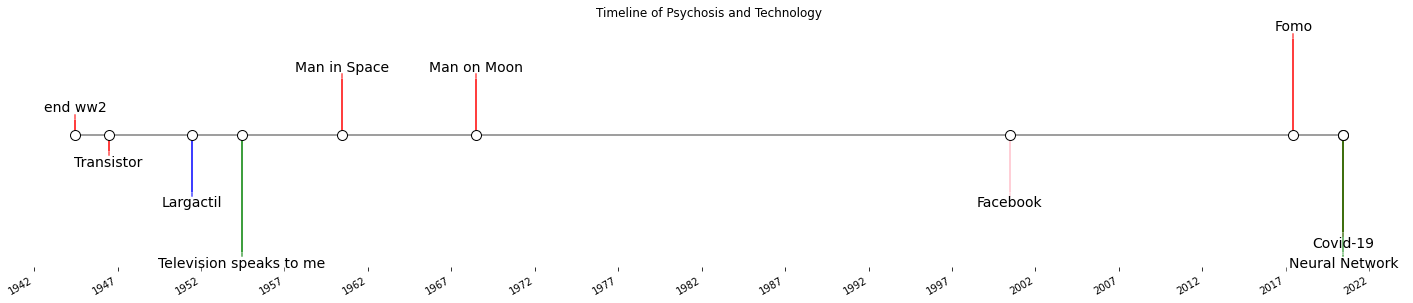

In [11]:
#levels = np.array([-5, 5, -3, 3, -1, 1])
fig, ax = plt.subplots(figsize=(25, 5))

# Create the base line
start = min(dates)
stop = max(dates)
ax.plot((start, stop), (0, 0), 'k', alpha=.5)

# Iterate through releases annotating each one
for ii, (iname, idate,ilevel) in enumerate(zip(names, dates,levels)):
    #level = levels[ii % 6]
    level= levels[ii]
    color= colors[ii]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    # Plot a line up to the text
    ax.plot((idate, idate), (0, level), c=color, alpha=1.0)
    # Give the text a faint background and align it properly
    ax.text(idate, level, iname,
            horizontalalignment='center', verticalalignment=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))
ax.set(title="Timeline of Psychosis and Technology")
# Set the xticks formatting
# format xaxis with 3 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=60))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%Y"))
fig.autofmt_xdate()

# Remove components for a cleaner look
plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)
plt.show()